In [284]:
import skimage
skimage.__version__

'0.13.1'

In [285]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [286]:
from skimage import data
coins = data.coins()

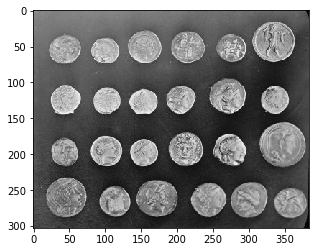

In [287]:
plt.imshow(coins, cmap='gray');

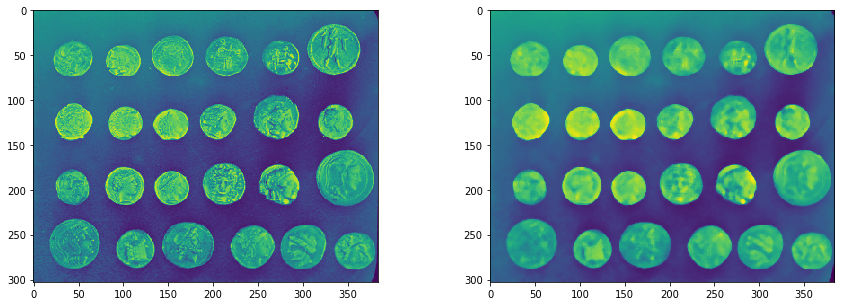

In [288]:
from skimage import filters

coins_denoised = filters.median(coins, selem=np.ones((5, 5)))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.imshow(coins)
ax1.imshow(coins_denoised);

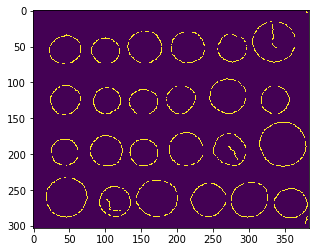

In [316]:
from skimage import feature
edges = skimage.feature.canny(coins, sigma=3)
plt.imshow(edges)

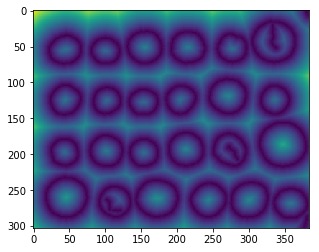

In [317]:
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)

plt.imshow(dt);


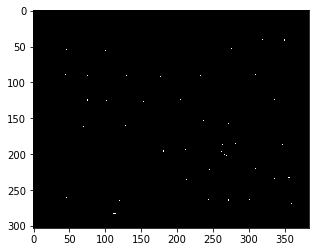

In [318]:
local_max = feature.peak_local_max(dt, indices=False, min_distance=5)
plt.imshow(local_max, cmap='gray');

In [320]:
peak_idx = feature.peak_local_max(dt, indices=True, min_distance=5)
peak_idx[:]

array([[283, 116],
       [283, 115],
       [283, 114],
       [283, 113],
       [282, 115],
       [282, 114],
       [282, 113],
       [282, 112],
       [282, 111],
       [269,  99],
       [268, 359],
       [264, 272],
       [264, 243],
       [264, 120],
       [263, 301],
       [263, 272],
       [263, 244],
       [262, 272],
       [261, 172],
       [260,  46],
       [235, 213],
       [234, 336],
       [234,  87],
       [232, 356],
       [232, 355],
       [232, 271],
       [228, 129],
       [222,  72],
       [221, 245],
       [221, 183],
       [220, 309],
       [202, 269],
       [201, 267],
       [200, 266],
       [198, 154],
       [197, 181],
       [197,  44],
       [196, 262],
       [196, 181],
       [195, 181],
       [195, 101],
       [193, 212],
       [186, 347],
       [186, 282],
       [186, 263],
       [185, 281],
       [162, 177],
       [162, 154],
       [162, 131],
       [162,  69],
       [162,  45],
       [162,  44],
       [162,

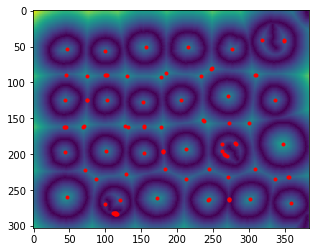

In [321]:
plt.plot(peak_idx[:,1], peak_idx[:,0], 'r.')
plt.imshow(dt);

In [322]:


from skimage import measure

markers = measure.label(local_max)



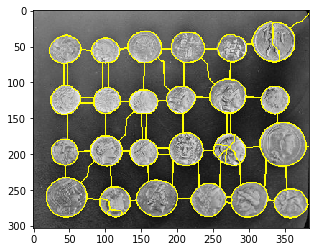

In [323]:
from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(coins, labels));

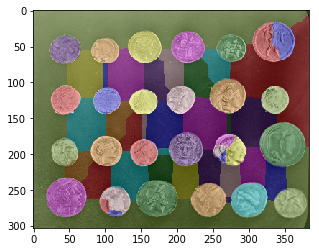

In [324]:
from skimage import color
plt.imshow(color.label2rgb(labels, image=coins));

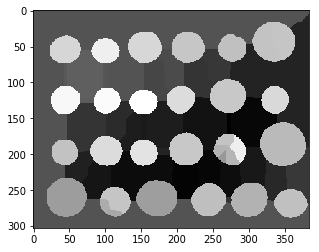

In [325]:
plt.imshow(color.label2rgb(labels, image=coins, kind='avg'), cmap='gray');


In [326]:
regions = measure.regionprops(labels, intensity_image=coins)

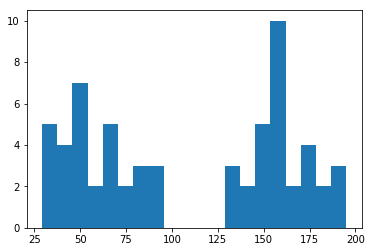

In [327]:
region_means = [r.mean_intensity for r in regions]
plt.hist(region_means, bins=20);

In [328]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

region_means = np.array(region_means).reshape(-1, 1)
model.fit(np.array(region_means).reshape(-1, 1))
print(model.cluster_centers_)

[[ 57.69284088]
 [160.09302022]]


In [329]:
bg_fg_labels = model.predict(region_means)
bg_fg_labels

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [330]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

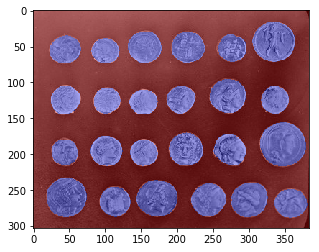

In [331]:
plt.imshow(color.label2rgb(classified_labels, image=coins));